# RCES Final Project - Fall 2020
### Topic: "Columbia River Flood Basalt Volanism"
##### By: Lisa Hlinka

## Introduction


#### Scientific Question
 
How does geochemistry and inferred volatile content evolve over the emplacement of the Columbia River Basalt Group?

#### Hypothesis

The Columbia River Basalt Group consists of 350 lava flows that are divided into 5 major formations: Steens, Imnaha, Grande Ronde, Wanapum, and Saddle Moutain. The earlier emplaced Steens formation consist of more primitive magmas, therefore I predict the Steens may have a greater volatile content than the later formations.

#### Dataset

[Compilation of geochemistry data from the Columbia River Plateau-Blue Mountains Province](https://drive.google.com/file/d/14ayP9bT4SRdWnwocO50IcPw0J963tqWR/view?usp=sharing)

File downloaded from the GEOROC - Geochemical database (http://georoc.mpch-mainz.gwdg.de/georoc/). 
<br/> Date of Query: November 13, 2020
<br/> Query Criteria: Query by Geologic Setting -> Continental Flood Basalts -> Yellowstone-Snake River Plain Volcanic Province -> Columbia Plateau-Blue Mountains Province -> No Further Constraint -> Sample Criteria (combined with OR) -> Type of Material: Volcanic Glass, Inclusion, Mineral, Wholerock 

## Setup and Data Manipulation 

<b>Step 1:</b> Import pandas, numpy, matplotlib, IPython figure display settings, cartopy. Install Pyrolite (Williams et al., 2020), a package useful for working with geochemical datasets.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from IPython import display
display.set_matplotlib_formats('retina')
%matplotlib inline
import cartopy
import cartopy.crs as ccrs

In [3]:
pip install pyrolite

  Using cached pyrolite-0.2.8-py3-none-any.whl (378 kB)
  Using cached tinydb-4.3.0-py3-none-any.whl (21 kB)
  Using cached xlrd-1.2.0-py2.py3-none-any.whl (103 kB)
Processing /home/jovyan/.cache/pip/wheels/f8/23/a4/a675f64940ea39ef98589c67941747b991ca956ae0c2873242/periodictable-1.5.3-py3-none-any.whl
  Using cached numpydoc-1.1.0-py3-none-any.whl (47 kB)
  Using cached openpyxl-3.0.5-py2.py3-none-any.whl (242 kB)
Processing /home/jovyan/.cache/pip/wheels/6e/96/b8/10037fe231e23970bac58361d7c93571ab983a7bbc55e68550/pathlib-1.0.1-py3-none-any.whl
  Using cached mpltern-0.3.2-py3-none-any.whl (25 kB)
  Using cached sympy-1.7-py3-none-any.whl (5.9 MB)
Processing /home/jovyan/.cache/pip/wheels/e2/46/78/e78f76c356bca9277368f1f97a31b37a8cb937176d9511af31/mpmath-1.1.0-py3-none-any.whl
  Using cached Sphinx-3.3.1-py3-none-any.whl (2.9 MB)
  Using cached jdcal-1.4.1-py2.py3-none-any.whl (9.5 kB)
Processing /home/jovyan/.cache/pip/wheels/e2/bd/55/048b4fd505716c4c298f42ee02dffd9496bb6d212b266c7f3

<br>
<b>Step 2:</b> Use pandas to open and read the .csv file of published geochemical data for the Columbia River Basalt. Skip bottom 3 rows containing citation and query information. Use df.info to view the dataframe columns and dtypes.

In [4]:
# Use pandas to read the .csv file.
df = pd.read_csv('GEOROC_Compilation_ColumbiaRiverPlateau_11_13_20.csv', skipfooter=3)
df.head()

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


,Year,CITATION,SAMPLE NAME,UNIQUE_ID,LOCATION,ELEVATION (MIN.),ELEVATION (MAX.),SAMPLING TECHNIQUE,DRILLING DEPTH (MIN.),DRILLING DEPTH (MAX.),...,ENSTATITE(MOL%),FAYALITE(MOL%),FORSTERITE(MOL%),FERROSILITE(MOL%),ORTHOCLASE(MOL%),TEPHROITE(MOL%),ULVOSPINEL(MOL%),WOLLASTONITE(MOL%),AGE(MA),AGE_PB206_U238(MA)
0,1966,[1594] CROCKET J. H. (1966),samp. B-5-D,NaN,YELLOWSTONE-SNAKE RIVER PLAIN VOLCANIC PROVINC...,NaN,NaN,OUTCROP,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1973,[1726] WALKER G. W. (1973),samp. GWW-1-7,NaN,YELLOWSTONE-SNAKE RIVER PLAIN VOLCANIC PROVINC...,NaN,NaN,OUTCROP,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1973,[1726] WALKER G. W. (1973),samp. GWW-3-71,NaN,YELLOWSTONE-SNAKE RIVER PLAIN VOLCANIC PROVINC...,NaN,NaN,OUTCROP,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1973,[1726] WALKER G. W. (1973),samp. EL-2-71,NaN,YELLOWSTONE-SNAKE RIVER PLAIN VOLCANIC PROVINC...,NaN,NaN,OUTCROP,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1970,[1728] OSAWA M. (1970),samp. PG-1,11271-PG-1,YELLOWSTONE-SNAKE RIVER PLAIN VOLCANIC PROVINC...,NaN,NaN,OUTCROP,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# View the available columns and Dtypes.
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9311 entries, 0 to 9310
Data columns (total 160 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Year                         object 
 1   CITATION                     object 
 2   SAMPLE NAME                  object 
 3   UNIQUE_ID                    object 
 4   LOCATION                     object 
 5   ELEVATION (MIN.)             float64
 6   ELEVATION (MAX.)             float64
 7   SAMPLING TECHNIQUE           object 
 8   DRILLING DEPTH (MIN.)        float64
 9   DRILLING DEPTH (MAX.)        float64
 10  LAND/SEA (SAMPLING)          object 
 11  ROCK TYPE                    object 
 12  ROCK NAME                    object 
 13  ROCK TEXTURE                 object 
 14  SAMPLE COMMENT               object 
 15  AGE (MIN.)                   float64
 16  AGE (MAX.)                   float64
 17  GEOLOGICAL AGE               object 
 18  GEOLOGICAL AGE PREFIX        object 
 19  ERUPT

</br>
<b>Step 3:</b> Extract the stratigraphic information from the "LOCATION" column using Pandas text data functions. Add the information as new columns titled "MEMBER" and "FORMATION".

In [7]:
df['MEMBER'] = df.LOCATION.str.split('/').str[-1]
df['FORMATION'] = df.MEMBER.str.split('-').str[0]

# FORMATION column has two different keys for the same formation, " WANAPUM BASALT FORMATION" and " WANAPUM BASALT". 
# Use df.replace to rename duplicate.

df = df.replace(to_replace=' WANAPUM BASALT FORMATION',value=' WANAPUM BASALT')
list(df.FORMATION.unique())

[' YAKIMA BASALT',
 ' PICTURE GORGE BASALT',
 ' STEENS BASALT',
 ' BEAR CREEK BASALT',
 ' IMNAHA BASALT',
 ' SADDLE MOUNTAINS BASALT',
 ' WANAPUM BASALT',
 ' GRANDE RONDE BASALT',
 ' COLUMBIA PLATEAU',
 ' WEST BUTTE SHIELD COMPLEX',
 ' SLIDE CREEK BASALT',
 ' POWDER RIVER BASALT',
 ' WEISER BASALT',
 ' STRAWBERRY MOUNTAIN FORMATION',
 ' CLARNO FORMATION',
 ' MALHEUR GORGE BASALT ',
 ' HOG CREEK SEQUENCE ',
 ' WILDCAT CREEK ASH',
 ' KEENEY SEQUENCE ',
 ' JORDAN RANCH TYPE SEQUENCE',
 ' DEVINE CANYON ASH',
 ' SOURDOUGH SEQUENCE ',
 ' KIVETT SEQUENCE',
 ' HIGH LAVA PLAINS VOLCANIC FIELD',
 'MALHEUR GORGE BASALT',
 ' VENATOR RANCH BASALT',
 ' HUNTER CREEK BASALT',
 ' VISHER CREEK RHYOLITE',
 ' SWAMP CREEK RHYOLITE',
 ' MCEWEN CREEK VITROPHYRE',
 ' DINNER CREEK TUFF',
 ' KOOL SPRING FORMATION',
 ' CIRCLE BAR RHYOLITE',
 ' SOUTH FORK DACITE',
 ' BLACK BUTTE RHYOLITE',
 ' PUEBLO MOUNTAINS BASALT',
 ' HAWKS VALLEY ',
 ' MONUMENT DIKE SWARM',
 ' CHIEF JOSEPH DIKE SWARM',
 ' JARBIDGE RHYOLITE',


</br>
<b>Step 4:</b> Make a list of the major element data columns, and add a new column to calculate the sum total wt.% of the major elment data. Normalize the major element data to 100%. Add new columns for the normalized major element data and their sum total wt.% (which should now equal 100%).

In [8]:
# Define Major Elements and create a new Column with the Major Element Total WT% for the Raw Data.
MAJOR_ELEMENTS_RAW = ['SIO2(WT%)','TIO2(WT%)','AL2O3(WT%)','MGO(WT%)','CAO(WT%)','K2O(WT%)',
                      'NA2O(WT%)','P2O5(WT%)','MNO(WT%)','FE2O3T(WT%)','FE2O3(WT%)','FEOT(WT%)',
                      'FEO(WT%)']
df['Total(WT%)RAW'] = df.loc[:,MAJOR_ELEMENTS_RAW].sum(axis=1, min_count=1)

# Normalize major element data to 100%. Create a new Column for each normalized element.
df['SIO2(WT%)NORM'] = (df['SIO2(WT%)']/df['Total(WT%)RAW'])*100
df['TIO2(WT%)NORM'] = (df['TIO2(WT%)']/df['Total(WT%)RAW'])*100
df['AL2O3(WT%)NORM'] = (df['AL2O3(WT%)']/df['Total(WT%)RAW'])*100
df['MGO(WT%)NORM'] = (df['MGO(WT%)']/df['Total(WT%)RAW'])*100
df['CAO(WT%)NORM'] = (df['CAO(WT%)']/df['Total(WT%)RAW'])*100
df['K2O(WT%)NORM'] = (df['K2O(WT%)']/df['Total(WT%)RAW'])*100
df['NA2O(WT%)NORM'] = (df['NA2O(WT%)']/df['Total(WT%)RAW'])*100
df['P2O5(WT%)NORM'] = (df['P2O5(WT%)']/df['Total(WT%)RAW'])*100
df['MNO(WT%)NORM'] = (df['MNO(WT%)']/df['Total(WT%)RAW'])*100
df['FE2O3T(WT%)NORM'] = (df['FE2O3T(WT%)']/df['Total(WT%)RAW'])*100
df['FE2O3(WT%)NORM'] = (df['FE2O3(WT%)']/df['Total(WT%)RAW'])*100
df['FEOT(WT%)NORM'] = (df['FEOT(WT%)']/df['Total(WT%)RAW'])*100
df['FEO(WT%)NORM'] = (df['FEO(WT%)']/df['Total(WT%)RAW'])*100

# Create a new Column with the Major Element Total wt.% for the Normalized Data.
MAJOR_ELEMENTS_NORM = ['SIO2(WT%)NORM','TIO2(WT%)NORM','AL2O3(WT%)NORM','MGO(WT%)NORM','CAO(WT%)NORM',
                       'K2O(WT%)NORM','NA2O(WT%)NORM','P2O5(WT%)NORM','MNO(WT%)NORM','FE2O3T(WT%)NORM',
                       'FE2O3(WT%)NORM','FEOT(WT%)NORM','FEO(WT%)NORM']
df['Total(WT%)NORM'] = df.loc[:,MAJOR_ELEMENTS_NORM].sum(axis=1, min_count=1)

<br/>
<b>Step 5</b>: Calculate the following geochemical characteristcs of the magma and add them as new columns.
<br/>   Total Alkali Content = Na2O + K2O
<br/>   Magnesium Number (MG#) = 100 * (MgO/40.3)/(MgO/40.3+FeOT/71.08)
<br/>   Europium Anomaly (Eu/Eu*) = (Eu)/((Sm * Gd))**0.5
<br/>   Dysprosium Anomaly (Dy/Dy*) = Dy/((La**(4/13))*(Yb**(9/13)) chondrite normalized
<br/>   Trace element ratios of interest: Dy/Yb, Ce/Y, Ba/La, H2O/Ce


In [58]:
# Create a new Column with Total Alkali content (NA2O + K2O).
df['NA2O+K2O(WT%)NORM'] = df['NA2O(WT%)NORM'] + df['K2O(WT%)NORM']

# Create a new Column with Magnesium # (MG#).
df['MG#'] = 100 * (df['MGO(WT%)NORM']/40.3) / (df['MGO(WT%)NORM']/40.3 / 40.3 + df['FEOT(WT%)NORM'] / 71.08)

# Create a new Column with Europium anomaly (EU/EU*).
df['EU/EU*'] = df['EU(PPM)'] / ((df['SM(PPM)'] * df['GD(PPM)']))**0.5

# Create a new Column with Dysprosium anomaly (DY/DY*).
df['DY/DY*'] = df['DY(PPM)'] / ((df['LA(PPM)']**(4/13))*df['YB(PPM)']**(9/13))

# Create a new Columns with trace element ratios of interest: DY/YB , CE/Y, BA/LA, H2O/Ce
df['DY/YB'] = df['DY(PPM)'] / df['YB(PPM)']  
df['CE/Y'] = df['CE(PPM)'] / df['Y(PPM)']  
df['BA/LA'] = df['BA(PPM)'] / df['LA(PPM)']

df['H2O/CE'] = (df['H2O(WT%)']*10000) / df['CE(PPM)']
# multiplied H2O Wt% by 10,000 to convert wt.% to PPM

</br>
<b>Step 6:</b> Split dataset by type of sample material (e.g. inclusion, mineral, glass, wholerock). Group dataset by formation, as we are interested in only Steens Basalt, Imnaha Basalt, Grande Ronde Basalt, Wanapum Basalt, and Saddle Mountains Basalt.

In [10]:
# Define boolean masks for sample type
# inclusion = df['TYPE OF MATERIAL'] == 'INCLUSION'
# mineral = df['TYPE OF MATERIAL'] == 'MINERAL / COMPONENT (INCL. GROUNDMASS)'
# glass = df['TYPE OF MATERIAL'] == 'VOLCANIC GLASS'
# wholerock = df['TYPE OF MATERIAL'] == 'WHOLE ROCK'

In [11]:
# Steens = df.groupby('FORMATION').get_group(' STEENS BASALT')
# Imnaha = df.groupby('FORMATION').get_group(' IMNAHA BASALT')
# SaddleMountain = df.groupby('FORMATION').get_group(' SADDLE MOUNTAINS BASALT')
# Wanapum = df.groupby('FORMATION').get_group(' WANAPUM BASALT')
# GrandeRonde = df.groupby('FORMATION').get_group(' GRANDE RONDE BASALT')

In [12]:
#Use the where function and groupby function to group data based on sample type and stratigraphic formation.
gb_inclusion = df.where(df['TYPE OF MATERIAL'] == 'INCLUSION').groupby('FORMATION')
gb_mineral = df.where(df['TYPE OF MATERIAL'] == 'MINERAL / COMPONENT (INCL. GROUNDMASS)').groupby('FORMATION')
gb_glass = df.where(df['TYPE OF MATERIAL'] == 'VOLCANIC GLASS').groupby('FORMATION')
gb_wholerock = df.where(df['TYPE OF MATERIAL'] == 'WHOLE ROCK').groupby('FORMATION')

In [13]:
# # Which formations do we have data for each sample type?
list(gb_inclusion.FORMATION.unique())

[array([' CHIEF JOSEPH DIKE SWARM'], dtype=object),
 array([' COLUMBIA PLATEAU'], dtype=object),
 array([' MONUMENT DIKE SWARM'], dtype=object),
 array([' STEENS BASALT'], dtype=object),
 array([' WANAPUM BASALT'], dtype=object)]

In [14]:
# # Which formations do we have data for each sample type?
list(gb_mineral.FORMATION.unique())

[array([' GRANDE RONDE BASALT'], dtype=object),
 array([' HIGH LAVA PLAINS VOLCANIC FIELD'], dtype=object),
 array([' IMNAHA BASALT'], dtype=object),
 array([' JARBIDGE RHYOLITE'], dtype=object),
 array([' JONSTONS CAMP RHYOLITE'], dtype=object),
 array([' PICTURE GORGE BASALT'], dtype=object),
 array([' ROUGH MONTAINS RHYOLITE'], dtype=object),
 array([' SADDLE MOUNTAINS BASALT'], dtype=object),
 array([' SHEEP CREEK LAPILLI TUFF'], dtype=object),
 array([' STEENS BASALT'], dtype=object),
 array([' WANAPUM BASALT'], dtype=object)]

In [15]:
list(gb_glass.FORMATION.unique())

[array([' GRANDE RONDE BASALT'], dtype=object),
 array([' HIGH LAVA PLAINS VOLCANIC FIELD'], dtype=object),
 array([' WANAPUM BASALT'], dtype=object)]

In [16]:
list(gb_wholerock.FORMATION.unique())

[array([' BEAR CREEK BASALT'], dtype=object),
 array([' BIEROTH VOLCANICS'], dtype=object),
 array([' BLACK BUTTE RHYOLITE'], dtype=object),
 array([' CEDAR CANYON TUFF'], dtype=object),
 array([' CHIEF JOSEPH DIKE SWARM'], dtype=object),
 array([' CIRCLE BAR RHYOLITE'], dtype=object),
 array([' CLARNO FORMATION'], dtype=object),
 array([' COLUMBIA PLATEAU'], dtype=object),
 array([' DEVINE CANYON ASH'], dtype=object),
 array([' DINNER CREEK TUFF'], dtype=object),
 array([' GRANDE RONDE BASALT'], dtype=object),
 array([' HAWKS VALLEY '], dtype=object),
 array([' HIGH LAVA PLAINS VOLCANIC FIELD'], dtype=object),
 array([' HOG CREEK SEQUENCE '], dtype=object),
 array([' HUNTER CREEK BASALT'], dtype=object),
 array([' IMNAHA BASALT'], dtype=object),
 array([' JARBIDGE RHYOLITE'], dtype=object),
 array([' JONSTONS CAMP RHYOLITE'], dtype=object),
 array([' JORDAN RANCH TYPE SEQUENCE'], dtype=object),
 array([' KEENEY SEQUENCE '], dtype=object),
 array([' KIVETT SEQUENCE'], dtype=object),
 a

## Sampling Location

<b>Step 7:</b> Use cartopy to create a map illustrating the geographical location of sampling sites. Use symbol shape to denote sample type and color to denote stratigraphic formation.

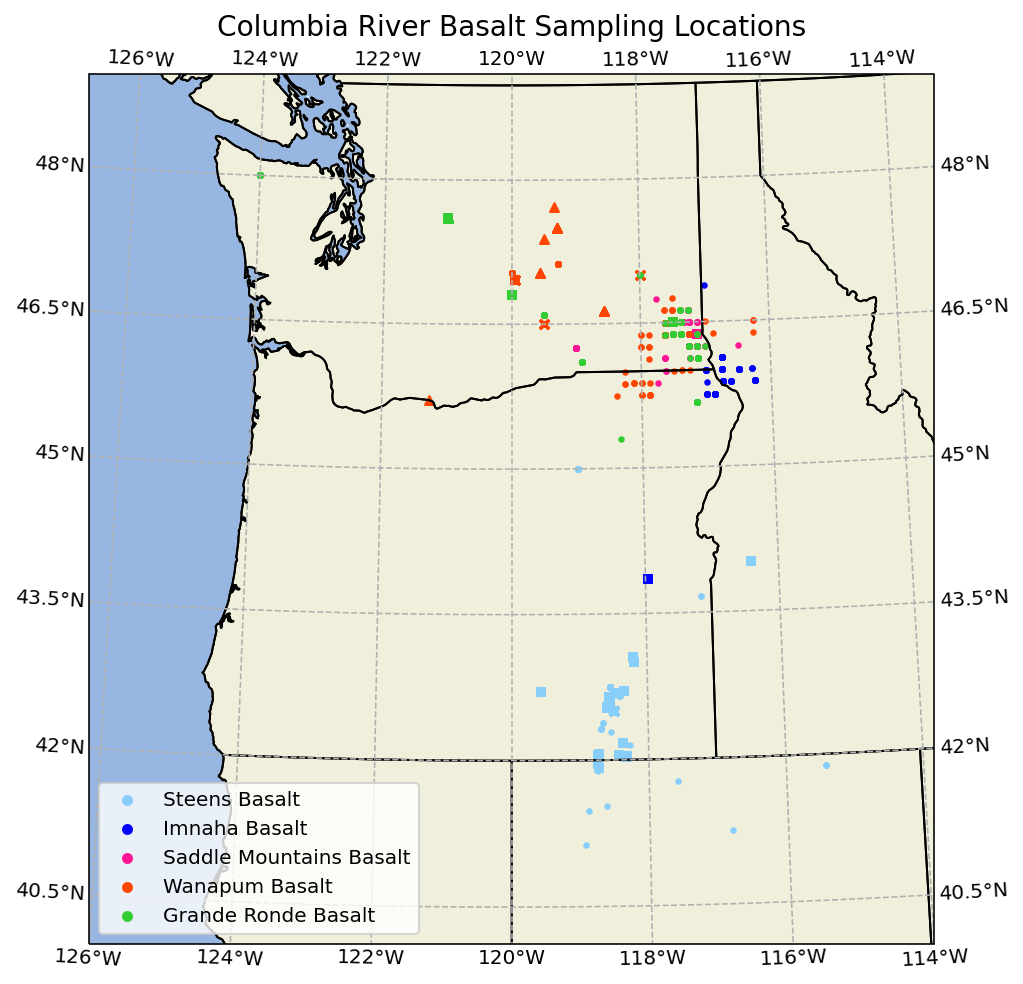

In [17]:
# Define the map extent and figure parameters.
central_lat = 44.5
central_lon = -120
extent = [-126, -114, 40, 49]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

plt.figure(figsize = [10,8])
ax = plt.axes(projection = ccrs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent)
ax.add_feature(cartopy.feature.STATES)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND)
ax.coastlines()

# Plot sampling locations.                                                                 
gb_inclusion.get_group(' STEENS BASALT').plot.scatter(ax=ax, x='LONGITUDE (MAX.)', y='LATITUDE (MAX.)', marker='x', c='lightskyblue', transform = ccrs.PlateCarree())
gb_inclusion.get_group(' WANAPUM BASALT').plot.scatter(ax=ax, x='LONGITUDE (MAX.)', y='LATITUDE (MAX.)', marker='x', c='orangered', transform = ccrs.PlateCarree())

gb_mineral.get_group(' STEENS BASALT').plot.scatter(ax=ax, x='LONGITUDE (MAX.)', y='LATITUDE (MAX.)', marker ='s', c='lightskyblue', transform = ccrs.PlateCarree())
gb_mineral.get_group(' IMNAHA BASALT').plot.scatter(ax=ax, x='LONGITUDE (MAX.)', y='LATITUDE (MAX.)', marker ='s', c='blue', transform = ccrs.PlateCarree())
gb_mineral.get_group(' SADDLE MOUNTAINS BASALT').plot.scatter(ax=ax, x='LONGITUDE (MAX.)', y='LATITUDE (MAX.)', marker ='s', c='deeppink', transform = ccrs.PlateCarree())
gb_mineral.get_group(' WANAPUM BASALT').plot.scatter(ax=ax, x='LONGITUDE (MAX.)', y='LATITUDE (MAX.)', marker ='s', c='orangered', transform = ccrs.PlateCarree())
gb_mineral.get_group(' GRANDE RONDE BASALT').plot.scatter(ax=ax, x='LONGITUDE (MAX.)', y='LATITUDE (MAX.)', marker ='s', c='limegreen', transform = ccrs.PlateCarree())

gb_glass.get_group(' WANAPUM BASALT').plot.scatter(ax=ax, x='LONGITUDE (MAX.)', y='LATITUDE (MAX.)', marker ='^', c='orangered', transform = ccrs.PlateCarree())
gb_glass.get_group(' GRANDE RONDE BASALT').plot.scatter(ax=ax, x='LONGITUDE (MAX.)', y='LATITUDE (MAX.)', marker ='^', c='limegreen', transform = ccrs.PlateCarree())

gb_wholerock.get_group(' STEENS BASALT').plot.scatter(ax=ax, x='LONGITUDE (MAX.)', y='LATITUDE (MAX.)', marker ='.', c='lightskyblue', label='Steens Basalt', transform = ccrs.PlateCarree())
gb_wholerock.get_group(' IMNAHA BASALT').plot.scatter(ax=ax, x='LONGITUDE (MAX.)', y='LATITUDE (MAX.)', marker ='.', c='blue', label='Imnaha Basalt', transform = ccrs.PlateCarree())
gb_wholerock.get_group(' SADDLE MOUNTAINS BASALT').plot.scatter(ax=ax, x='LONGITUDE (MAX.)', y='LATITUDE (MAX.)', marker ='.', c='deeppink', label='Saddle Mountains Basalt', transform = ccrs.PlateCarree())
gb_wholerock.get_group(' WANAPUM BASALT').plot.scatter(ax=ax, x='LONGITUDE (MAX.)', y='LATITUDE (MAX.)', marker ='.', c='orangered',label='Wanapum Basalt', transform = ccrs.PlateCarree())
gb_wholerock.get_group(' GRANDE RONDE BASALT').plot.scatter(ax=ax, x='LONGITUDE (MAX.)', y='LATITUDE (MAX.)', marker ='.', c='limegreen',label='Grande Ronde Basalt', transform = ccrs.PlateCarree())

# Add Legend, gridlines, and labels.
ax.set_title('Columbia River Basalt Sampling Locations', fontsize = 14)
ax.set_xlabel('Longitude', fontsize = 12)
ax.set_ylabel('Latitude', fontsize = 12)
ax.legend(fontsize = 10, markerscale = 2, loc='lower left')
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle ='dashed');

<b>Figure 1:</b> Map displaying geographic location of CRBG Sampling sites in the Pacific Northwest United States. Symbol shape denotes sample type, wholerock displayed as circles, inclusions displayed as x's, glass displayed as triangles.
<br/>
<br/>
<br/>


## Major Element Analysis

<b>Step 8:</b> Analyze the evolution of major element geochemistry over the emplacement of the Columbia River Basalt Group. Plot Total Alkali-Silica (TAS) diagram grouped by stratigraphic formation for inclusions, volcanic glass and wholerock data. Use different symbol shape for each sample type (inclusion, glass, wholerock) and color to denote stratigraphic formation.

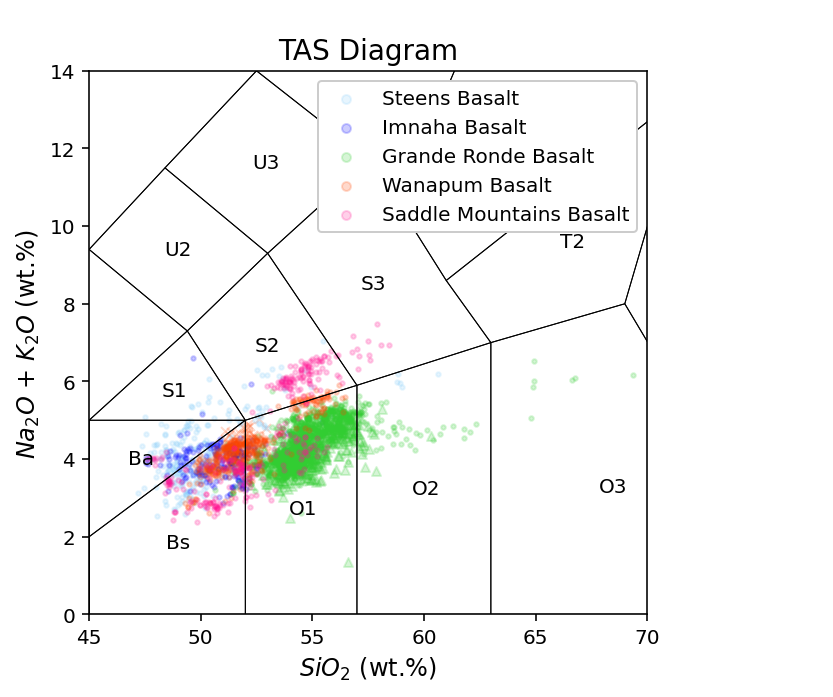

In [71]:
# Import TAS diagram template from pyrolite package.
from pyrolite.util.plot.axes import share_axes
from pyrolite.plot.templates import TAS

# Plot Total Alkali content vs. SiO2 for inclusion, glass, and wholerock data.
ax = TAS(linewidth=0.5, labels='ID', figsize=[5,5])
gb_inclusion.get_group(' STEENS BASALT').plot.scatter(ax=ax, x='SIO2(WT%)NORM', y='NA2O+K2O(WT%)NORM', c='lightskyblue', marker='x', alpha = 0.2)
gb_inclusion.get_group(' WANAPUM BASALT').plot.scatter(ax=ax, x='SIO2(WT%)NORM', y='NA2O+K2O(WT%)NORM', c='orangered', marker='x', alpha = 0.2)

gb_glass.get_group(' WANAPUM BASALT').plot.scatter(ax=ax, x='SIO2(WT%)NORM', y='NA2O+K2O(WT%)NORM', c='orangered', marker='^', alpha = 0.2)
gb_glass.get_group(' GRANDE RONDE BASALT').plot.scatter(ax=ax, x='SIO2(WT%)NORM', y='NA2O+K2O(WT%)NORM', c='limegreen', marker='^', alpha = 0.2)

gb_wholerock.get_group(' STEENS BASALT').plot.scatter(ax=ax, x='SIO2(WT%)NORM', y='NA2O+K2O(WT%)NORM', c='lightskyblue', marker='.', alpha = 0.2, label='Steens Basalt')
gb_wholerock.get_group(' IMNAHA BASALT').plot.scatter(ax=ax, x='SIO2(WT%)NORM', y='NA2O+K2O(WT%)NORM', c='blue', marker='.', alpha = 0.2, label='Imnaha Basalt')
gb_wholerock.get_group(' GRANDE RONDE BASALT').plot.scatter(ax=ax, x='SIO2(WT%)NORM', y='NA2O+K2O(WT%)NORM', c='limegreen', marker='.', alpha = 0.2, label='Grande Ronde Basalt')
gb_wholerock.get_group(' WANAPUM BASALT').plot.scatter(ax=ax, x='SIO2(WT%)NORM', y='NA2O+K2O(WT%)NORM', c='orangered', marker='.', alpha = 0.2, label='Wanapum Basalt')
gb_wholerock.get_group(' SADDLE MOUNTAINS BASALT').plot.scatter(ax=ax, x='SIO2(WT%)NORM', y='NA2O+K2O(WT%)NORM', c='deeppink', marker='.', alpha = 0.2, label='Saddle Mountains Basalt')

# Add labels, legend, and adjust x- and y- plot extent
ax.set_title('TAS Diagram', fontsize = 14)
ax.set_xlabel('$SiO_2$ (wt.%)', fontsize = 12)
ax.set_ylabel('$Na_2O$ + $K_2O$ (wt.%)', fontsize = 12)
ax.set_xlim(45,70)
ax.set_ylim(0,14)
ax.legend(fontsize = 10, markerscale = 2, loc = 'upper right', frameon=True, facecolor='inherit', framealpha=True);

<b>Figure 2:</b> Total Alkali Silica Diagram of published CRBG inclusion, glass, and wholerock data.
<br/>
<br/>
<br/>


<b>Step 9:</b> Analyze the evolution of major element geochemistry over the emplacement of the Columbia River Basalt Group. Plot Harker Variation diagram grouped by stratigraphic formation for inclusions, volcanic glass and wholerock data. Use different symbol shape for each sample type (inclusion, glass, wholerock) and color to denote stratigraphic formation.

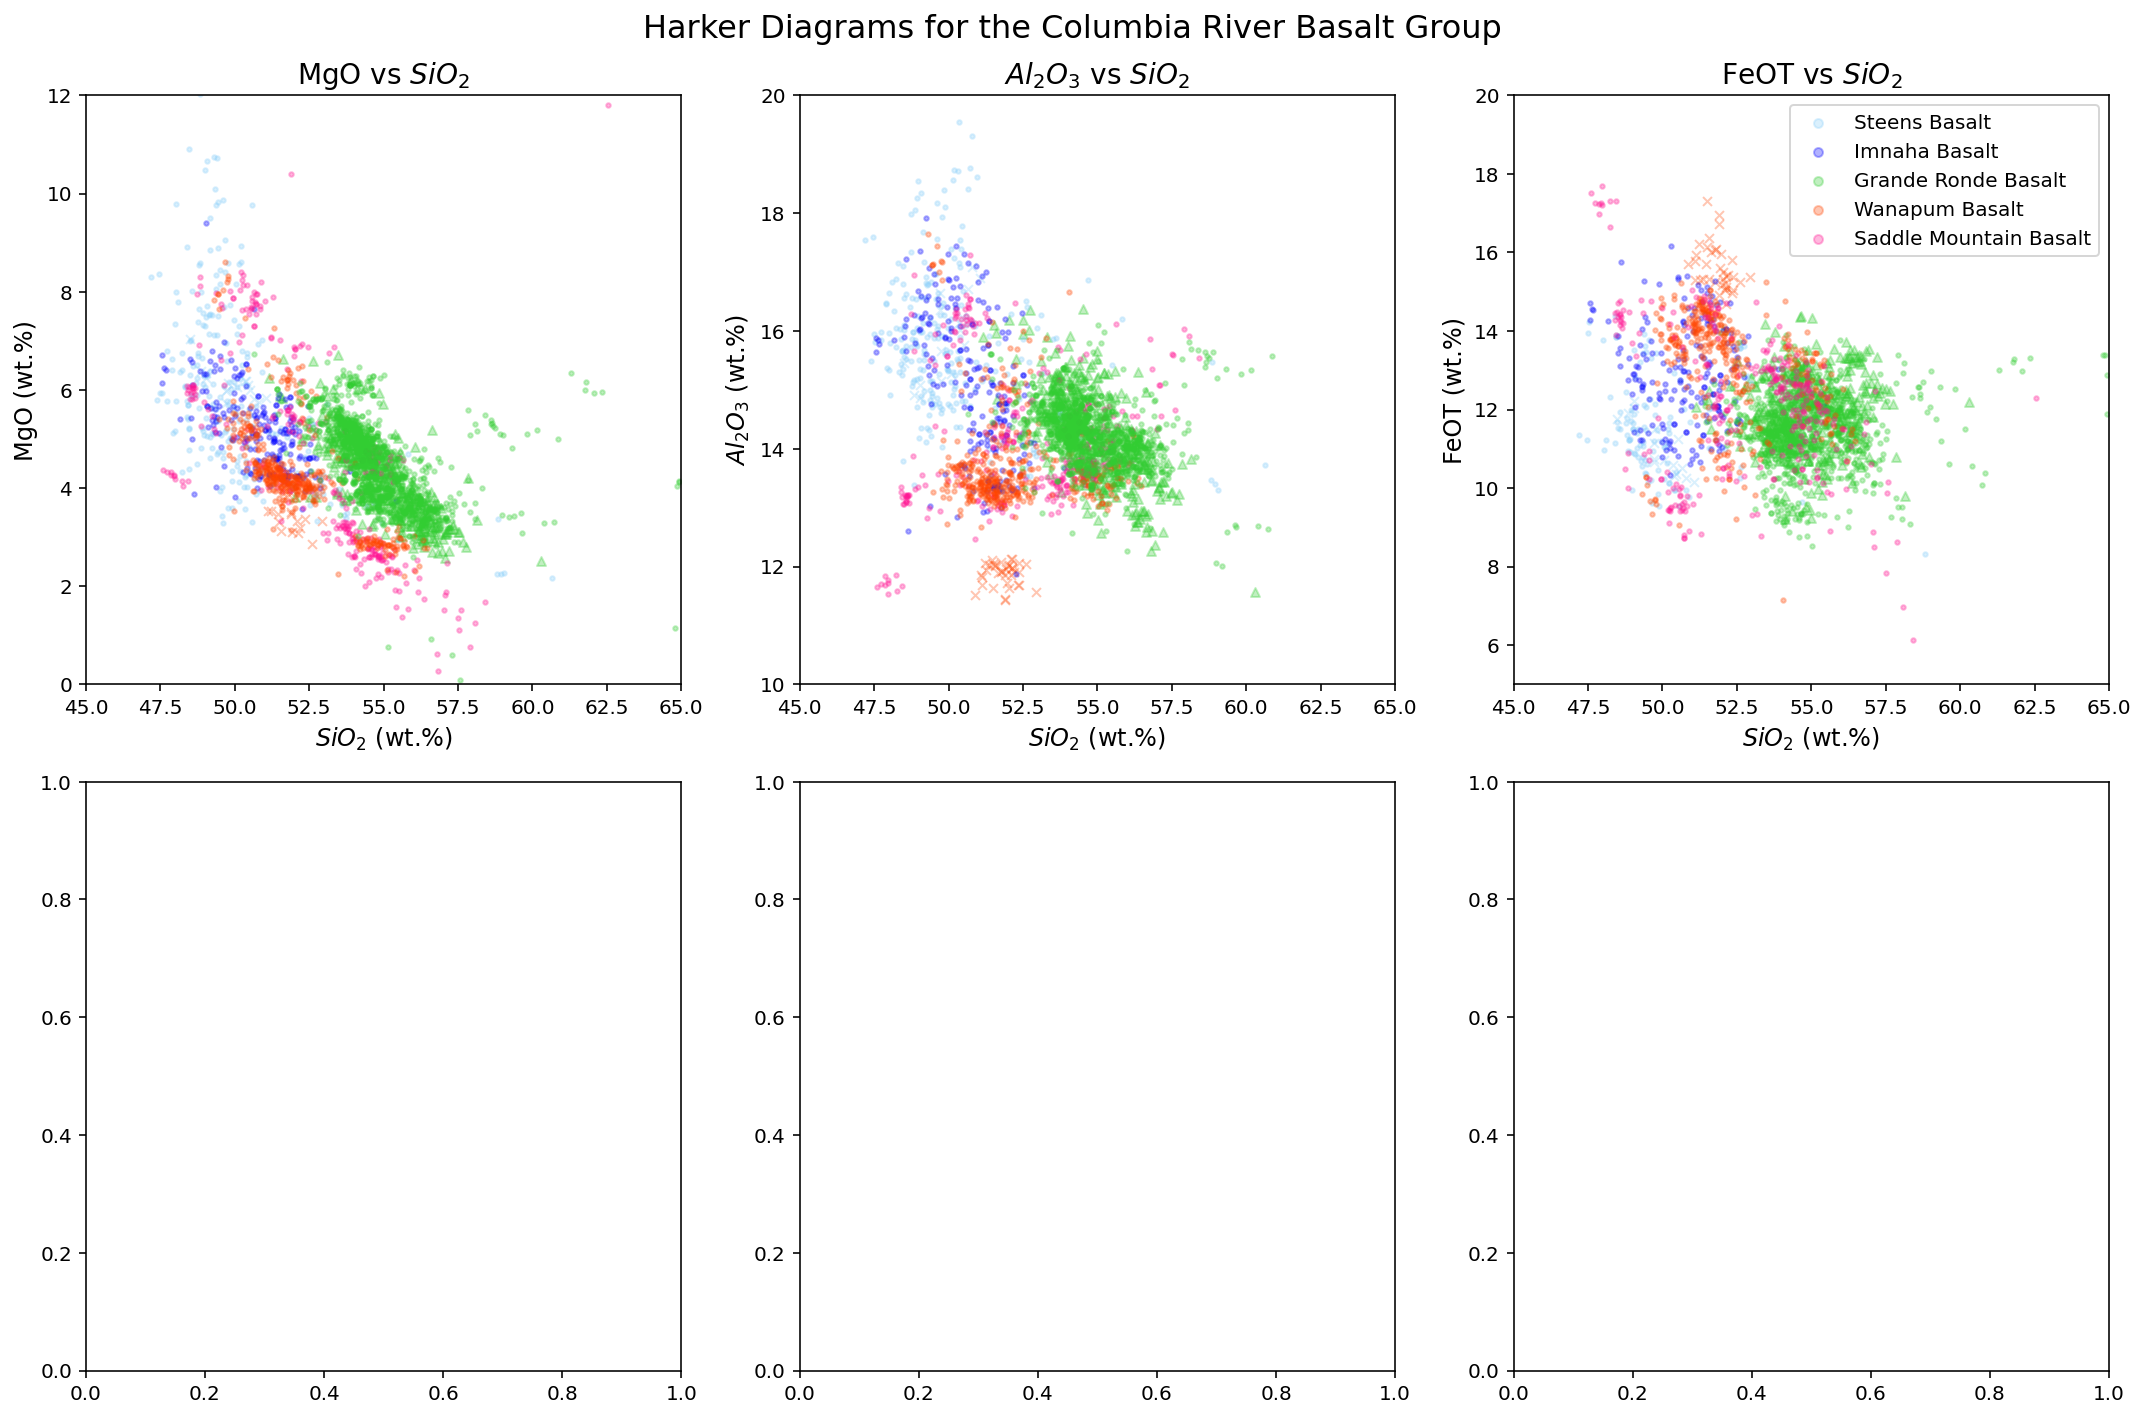

In [68]:
# Create a 2x3 panel figure
fig, ax = plt.subplots(2, 3, figsize=(15,10), tight_layout = True)
fig.suptitle('Harker Diagrams for the Columbia River Basalt Group', fontsize=16)

# Plot inclusion, glass, and wholerock data on Harker Diagram
gb_inclusion.get_group(' STEENS BASALT').plot.scatter(x='SIO2(WT%)NORM', y='MGO(WT%)NORM', c='lightskyblue', marker='x', alpha=0.3, ax=ax[0,0])
gb_inclusion.get_group(' WANAPUM BASALT').plot.scatter(x='SIO2(WT%)NORM', y='MGO(WT%)NORM', c='orangered', marker='x', alpha=0.3, ax=ax[0,0])
gb_glass.get_group(' WANAPUM BASALT').plot.scatter(x='SIO2(WT%)NORM', y='MGO(WT%)NORM', c='orangered', marker='^', alpha=0.3, ax=ax[0,0])
gb_glass.get_group(' GRANDE RONDE BASALT').plot.scatter(x='SIO2(WT%)NORM', y='MGO(WT%)NORM', c='limegreen', marker='^', alpha=0.3, ax=ax[0,0])
gb_wholerock.get_group(' STEENS BASALT').plot.scatter(x='SIO2(WT%)NORM', y='MGO(WT%)NORM', c='lightskyblue', marker='.', alpha = 0.3, ax=ax[0,0])
gb_wholerock.get_group(' IMNAHA BASALT').plot.scatter(x='SIO2(WT%)NORM', y='MGO(WT%)NORM', c='blue', marker='.', alpha = 0.3, ax=ax[0,0])
gb_wholerock.get_group(' SADDLE MOUNTAINS BASALT').plot.scatter(x='SIO2(WT%)NORM', y='MGO(WT%)NORM', c='deeppink', marker='.', alpha = 0.3, ax=ax[0,0])
gb_wholerock.get_group(' WANAPUM BASALT').plot.scatter(x='SIO2(WT%)NORM', y='MGO(WT%)NORM', c='orangered', marker='.', alpha = 0.3, ax=ax[0,0])
gb_wholerock.get_group(' GRANDE RONDE BASALT').plot.scatter(x='SIO2(WT%)NORM', y='MGO(WT%)NORM', c='limegreen', marker='.', alpha = 0.3, ax=ax[0,0])

gb_inclusion.get_group(' STEENS BASALT').plot.scatter(x='SIO2(WT%)NORM', y='AL2O3(WT%)NORM', c='lightskyblue', marker='x', alpha=0.3, ax=ax[0,1])
gb_inclusion.get_group(' WANAPUM BASALT').plot.scatter(x='SIO2(WT%)NORM', y='AL2O3(WT%)NORM', c='orangered', marker='x', alpha=0.3, ax=ax[0,1])
gb_glass.get_group(' WANAPUM BASALT').plot.scatter(x='SIO2(WT%)NORM', y='AL2O3(WT%)NORM', c='orangered', marker='^', alpha=0.3, ax=ax[0,1])
gb_glass.get_group(' GRANDE RONDE BASALT').plot.scatter(x='SIO2(WT%)NORM', y='AL2O3(WT%)NORM', c='limegreen', marker='^', alpha=0.3, ax=ax[0,1])
gb_wholerock.get_group(' STEENS BASALT').plot.scatter(x='SIO2(WT%)NORM', y='AL2O3(WT%)NORM', c='lightskyblue', marker='.', alpha = 0.3, ax=ax[0,1])
gb_wholerock.get_group(' IMNAHA BASALT').plot.scatter(x='SIO2(WT%)NORM', y='AL2O3(WT%)NORM', c='blue', marker='.', alpha = 0.3, ax=ax[0,1])
gb_wholerock.get_group(' SADDLE MOUNTAINS BASALT').plot.scatter(x='SIO2(WT%)NORM', y='AL2O3(WT%)NORM', c='deeppink', marker='.', alpha = 0.3, ax=ax[0,1])
gb_wholerock.get_group(' WANAPUM BASALT').plot.scatter(x='SIO2(WT%)NORM', y='AL2O3(WT%)NORM', c='orangered', marker='.', alpha = 0.3, ax=ax[0,1])
gb_wholerock.get_group(' GRANDE RONDE BASALT').plot.scatter(x='SIO2(WT%)NORM', y='AL2O3(WT%)NORM', c='limegreen', marker='.', alpha = 0.3, ax=ax[0,1])

gb_inclusion.get_group(' STEENS BASALT').plot.scatter(x='SIO2(WT%)NORM', y='FEOT(WT%)NORM', c='lightskyblue', marker='x', alpha=0.3, ax=ax[0,2])
gb_inclusion.get_group(' WANAPUM BASALT').plot.scatter(x='SIO2(WT%)NORM', y='FEOT(WT%)NORM', c='orangered', marker='x', alpha=0.3, ax=ax[0,2])
gb_glass.get_group(' WANAPUM BASALT').plot.scatter(x='SIO2(WT%)NORM', y='FEOT(WT%)NORM', c='orangered', marker='^', alpha=0.3, ax=ax[0,2])
gb_glass.get_group(' GRANDE RONDE BASALT').plot.scatter(x='SIO2(WT%)NORM', y='FEOT(WT%)NORM', c='limegreen', marker='^', alpha=0.3, ax=ax[0,2])
gb_wholerock.get_group(' STEENS BASALT').plot.scatter(x='SIO2(WT%)NORM', y='FEOT(WT%)NORM', c='lightskyblue', marker='.', alpha = 0.3,label='Steens Basalt', ax=ax[0,2])
gb_wholerock.get_group(' IMNAHA BASALT').plot.scatter(x='SIO2(WT%)NORM', y='FEOT(WT%)NORM', c='blue', marker='.', alpha = 0.3,label='Imnaha Basalt', ax=ax[0,2])
gb_wholerock.get_group(' GRANDE RONDE BASALT').plot.scatter(x='SIO2(WT%)NORM', y='FEOT(WT%)NORM', c='limegreen', marker='.', alpha = 0.3,label='Grande Ronde Basalt', ax=ax[0,2])
gb_wholerock.get_group(' WANAPUM BASALT').plot.scatter(x='SIO2(WT%)NORM', y='FEOT(WT%)NORM', c='orangered', marker='.', alpha = 0.3,label='Wanapum Basalt', ax=ax[0,2])
gb_wholerock.get_group(' SADDLE MOUNTAINS BASALT').plot.scatter(x='SIO2(WT%)NORM', y='FEOT(WT%)NORM', c='deeppink', marker='.', alpha = 0.3,label='Saddle Mountain Basalt', ax=ax[0,2])

# Add labels, legend, and adjust x- and y- plot extent
ax[0,0].set_title('MgO vs $SiO_2$', fontsize = 14)
ax[0,0].set_xlabel('$SiO_2$ (wt.%)', fontsize = 12)
ax[0,0].set_ylabel('MgO (wt.%)', fontsize = 12)
ax[0,0].set_xlim(45,65)
ax[0,0].set_ylim(0,12)

ax[0,1].set_title('$Al_2O_3$ vs $SiO_2$', fontsize = 14)
ax[0,1].set_xlabel('$SiO_2$ (wt.%)', fontsize = 12)
ax[0,1].set_ylabel('$Al_2O_3$ (wt.%)', fontsize = 12)
ax[0,1].set_xlim(45,65)
ax[0,1].set_ylim(10,20)

ax[0,2].set_title('FeOT vs $SiO_2$', fontsize = 14)
ax[0,2].set_xlabel('$SiO_2$ (wt.%)', fontsize = 12)
ax[0,2].set_ylabel('FeOT (wt.%)', fontsize = 12)
ax[0,2].set_xlim(45,65)
ax[0,2].set_ylim(5,20)
ax[0,2].legend(fontsize = 10, markerscale = 2, loc='upper right', frameon=True);

<b>Figure 3:</b> Harker Diagram of major element composition for inclusions, glasses, and whole rock for each formation. Symbol shape denotes sample type, wholerock displayed as circles, inclusions displayed as x's, glass displayed as triangles.
<br/>
<br/>
<br/>


</br>
<b>Step 10:</b> Compare Mg# for different formations

''

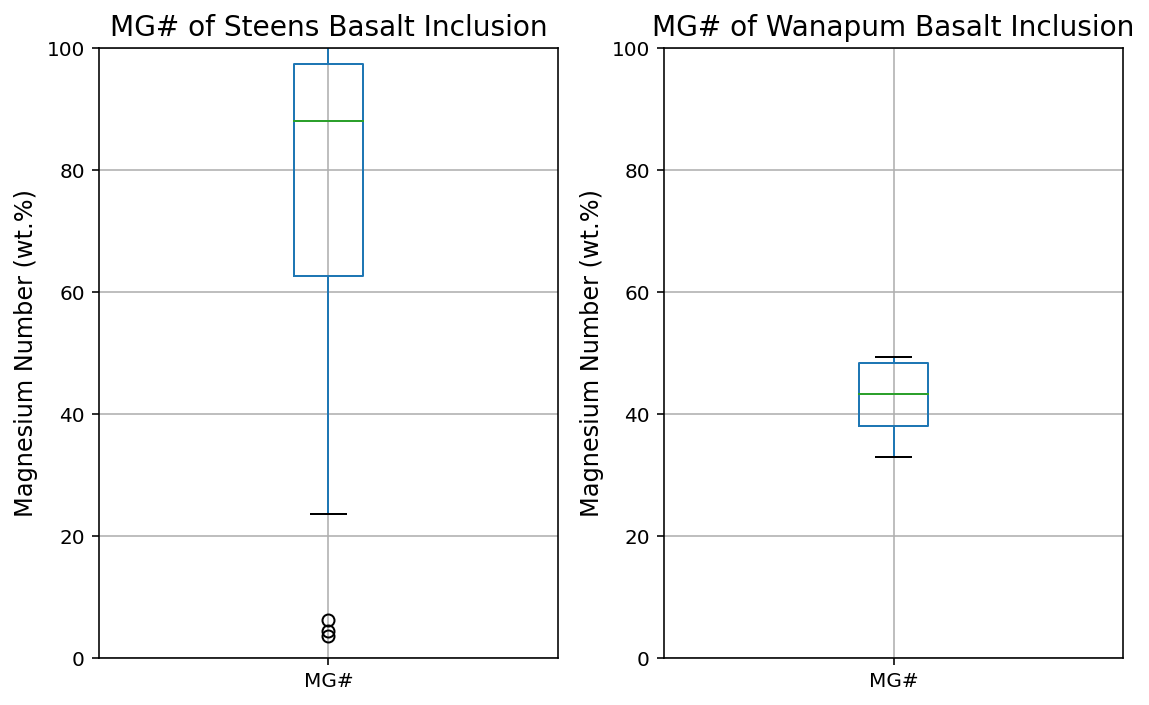

In [22]:
# fig, ax= plt.subplots(ncols=2, figsize=(8,5), tight_layout = True)

# gb_inclusion.get_group(' STEENS BASALT').boxplot(column=['MG#'], ax=ax[0])
# ax[0].set_ylim(0,100)
# ax[0].set_ylabel('Magnesium Number (wt.%)', fontsize = 12)
# ax[0].set_title('MG# of Steens Basalt Inclusion', fontsize = 14)

# gb_inclusion.get_group(' WANAPUM BASALT').boxplot(column=['MG#'], ax=ax[1])
# ax[1].set_ylim(0,100)
# ax[1].set_ylabel('Magnesium Number (wt.%)', fontsize = 12)
# ax[1].set_title('MG# of Wanapum Basalt Inclusion', fontsize = 14)
;

<b>Figure X:</b> Magnesium number from inclusion data. The earlier emplaced Steens Basalt disply a more primitive composition than the more recent Wanapum formation.
<br/>
<br/>
<br/>


## Trace Element Analysis

<b>Step 11:</b> Analyze the evolution of trace element geochemistry over the emplacement of the Columbia River Basalt Group. Use Zr as an index of magma differentiation. Plot Y, Ce/Y, and Ba/La vs Zr, grouped by stratigraphic formation for volcanic glass and inclusions. Use different symbol shape for each sample type (inclusion, glass, wholerock). Use color to denote stratigraphic unit.

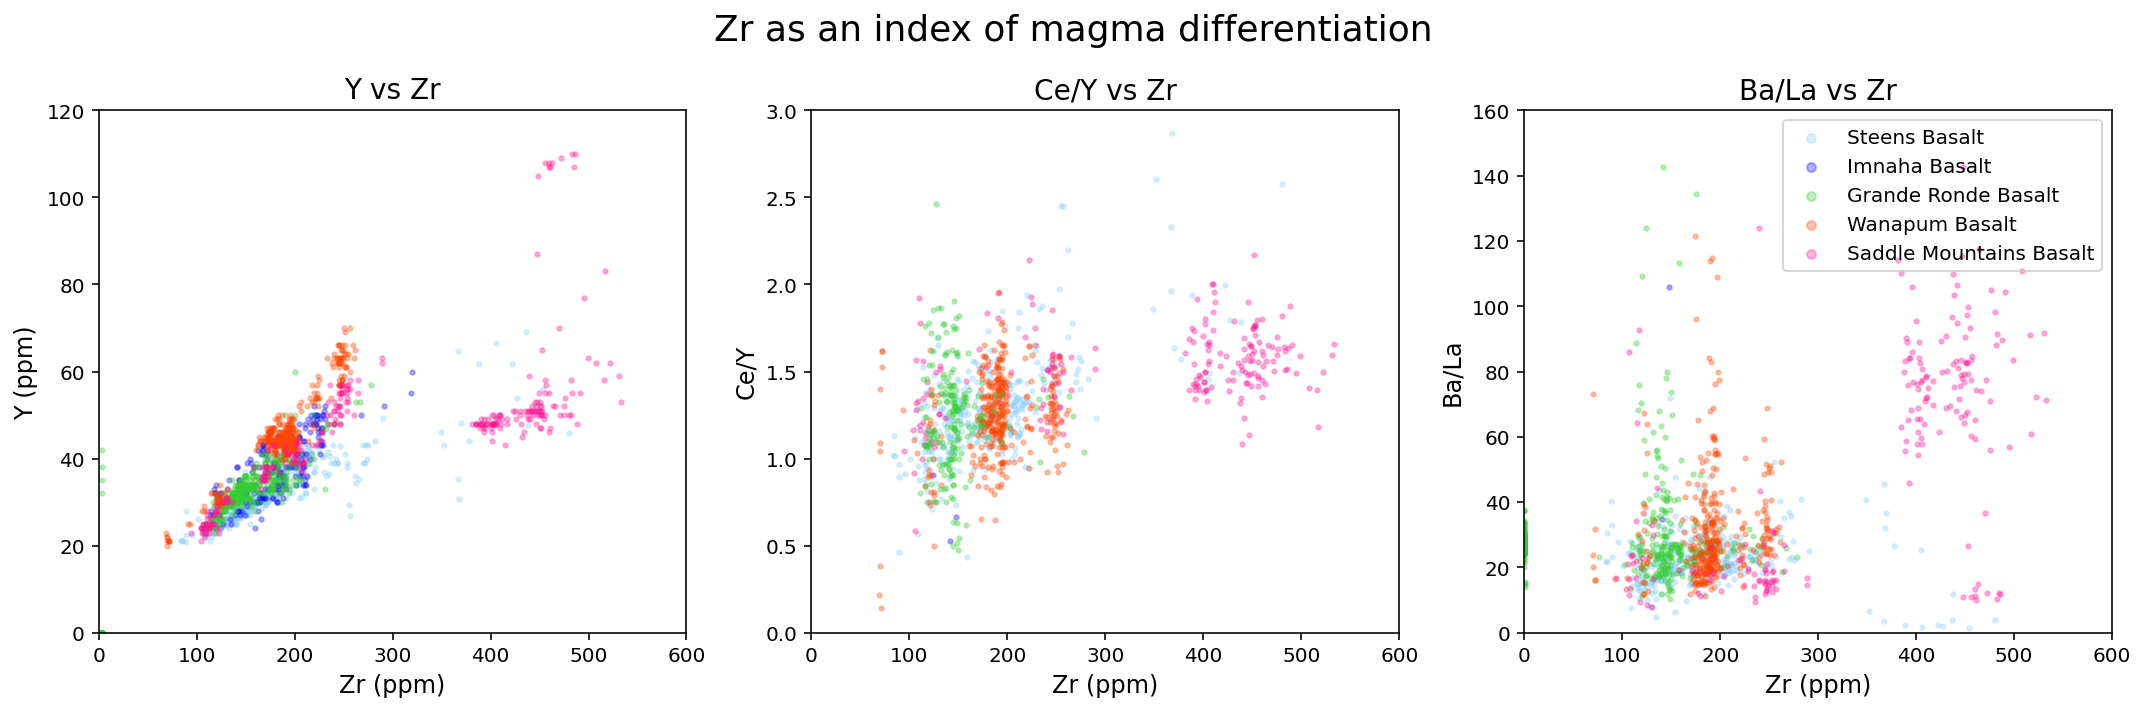

In [59]:
# Create a 3 column figure.
fig, ax= plt.subplots(ncols=3, figsize=(15,5), tight_layout = True)
fig.suptitle('Zr as an index of magma differentiation', fontsize=18)

# Plot Zr as an index of magma differentiation. (a) Y vs. Zr, (b) Ce/Y vs. Zr (c) Ba/La vs. Zr.
gb_inclusion.get_group(' STEENS BASALT').plot.scatter(x='ZR(PPM)', y='Y(PPM)', c='lightskyblue', marker='x', alpha=0.3, ax=ax[0])
gb_inclusion.get_group(' WANAPUM BASALT').plot.scatter(x='ZR(PPM)', y='Y(PPM)', c='orangered', marker='x', alpha=0.3, ax=ax[0])
gb_glass.get_group(' WANAPUM BASALT').plot.scatter(x='ZR(PPM)', y='Y(PPM)', c='orangered', marker='^', alpha=0.3, ax=ax[0])
gb_glass.get_group(' GRANDE RONDE BASALT').plot.scatter(x='ZR(PPM)', y='Y(PPM)', c='limegreen', marker='^', alpha=0.3, ax=ax[0])
gb_wholerock.get_group(' STEENS BASALT').plot.scatter(x='ZR(PPM)', y='Y(PPM)', c='lightskyblue', marker='.', alpha = 0.3, ax=ax[0])
gb_wholerock.get_group(' IMNAHA BASALT').plot.scatter(x='ZR(PPM)', y='Y(PPM)', c='blue', marker='.', alpha = 0.3, ax=ax[0])
gb_wholerock.get_group(' GRANDE RONDE BASALT').plot.scatter(x='ZR(PPM)', y='Y(PPM)', c='limegreen', marker='.', alpha = 0.3, ax=ax[0])
gb_wholerock.get_group(' WANAPUM BASALT').plot.scatter(x='ZR(PPM)', y='Y(PPM)', c='orangered', marker='.', alpha = 0.3, ax=ax[0])
gb_wholerock.get_group(' SADDLE MOUNTAINS BASALT').plot.scatter(x='ZR(PPM)', y='Y(PPM)', c='deeppink', marker='.', alpha = 0.3, ax=ax[0])

gb_inclusion.get_group(' STEENS BASALT').plot.scatter(x='ZR(PPM)', y='CE/Y', c='lightskyblue', marker='x', alpha=0.3, ax=ax[1])
gb_inclusion.get_group(' WANAPUM BASALT').plot.scatter(x='ZR(PPM)', y='CE/Y', c='orangered', marker='x', alpha=0.3, ax=ax[1])
gb_glass.get_group(' WANAPUM BASALT').plot.scatter(x='ZR(PPM)', y='CE/Y', c='orangered', marker='^', alpha=0.3, ax=ax[1])
gb_glass.get_group(' GRANDE RONDE BASALT').plot.scatter(x='ZR(PPM)', y='CE/Y', c='limegreen', marker='^', alpha=0.3, ax=ax[1])
gb_wholerock.get_group(' STEENS BASALT').plot.scatter(x='ZR(PPM)', y='CE/Y', c='lightskyblue', marker='.', alpha = 0.3, ax=ax[1])
gb_wholerock.get_group(' IMNAHA BASALT').plot.scatter(x='ZR(PPM)', y='CE/Y', c='blue', marker='.', alpha = 0.3, ax=ax[1])
gb_wholerock.get_group(' SADDLE MOUNTAINS BASALT').plot.scatter(x='ZR(PPM)', y='CE/Y', c='deeppink', marker='.', alpha = 0.3, ax=ax[1])
gb_wholerock.get_group(' WANAPUM BASALT').plot.scatter(x='ZR(PPM)', y='CE/Y', c='orangered', marker='.', alpha = 0.3, ax=ax[1])
gb_wholerock.get_group(' GRANDE RONDE BASALT').plot.scatter(x='ZR(PPM)', y='CE/Y', c='limegreen', marker='.', alpha = 0.3, ax=ax[1])

gb_inclusion.get_group(' STEENS BASALT').plot.scatter(x='ZR(PPM)', y='BA/LA', c='lightskyblue', marker='x', alpha=0.3, ax=ax[2])
gb_inclusion.get_group(' WANAPUM BASALT').plot.scatter(x='ZR(PPM)', y='BA/LA', c='orangered', marker='x', alpha=0.3, ax=ax[2])
gb_glass.get_group(' WANAPUM BASALT').plot.scatter(x='ZR(PPM)', y='BA/LA', c='orangered', marker='^', alpha=0.3, ax=ax[2])
gb_glass.get_group(' GRANDE RONDE BASALT').plot.scatter(x='ZR(PPM)', y='BA/LA', c='limegreen', marker='^', alpha=0.3, ax=ax[2])
gb_wholerock.get_group(' STEENS BASALT').plot.scatter(x='ZR(PPM)', y='BA/LA', c='lightskyblue', marker='.', alpha = 0.3, label='Steens Basalt', ax=ax[2])
gb_wholerock.get_group(' IMNAHA BASALT').plot.scatter(x='ZR(PPM)', y='BA/LA', c='blue', marker='.', alpha = 0.3, label='Imnaha Basalt', ax=ax[2])
gb_wholerock.get_group(' GRANDE RONDE BASALT').plot.scatter(x='ZR(PPM)', y='BA/LA', c='limegreen', marker='.', alpha = 0.3, label='Grande Ronde Basalt', ax=ax[2])
gb_wholerock.get_group(' WANAPUM BASALT').plot.scatter(x='ZR(PPM)', y='BA/LA', c='orangered', marker='.', alpha = 0.3, label='Wanapum Basalt', ax=ax[2])
gb_wholerock.get_group(' SADDLE MOUNTAINS BASALT').plot.scatter(x='ZR(PPM)', y='BA/LA', c='deeppink', marker='.', alpha = 0.3, label='Saddle Mountains Basalt', ax=ax[2])

# Add labels, legend, and set x- and y- axis extents.
ax[0].set_title('Y vs Zr', fontsize = 14)
ax[0].set_xlabel('Zr (ppm)', fontsize = 12)
ax[0].set_ylabel('Y (ppm)', fontsize = 12)
ax[0].set_xlim(0,600)
ax[0].set_ylim(0,120)

ax[1].set_title('Ce/Y vs Zr', fontsize = 14)
ax[1].set_xlabel('Zr (ppm)', fontsize = 12)
ax[1].set_ylabel('Ce/Y', fontsize = 12)
ax[1].set_xlim(0,600)
ax[1].set_ylim(0,3)

ax[2].set_title('Ba/La vs Zr', fontsize = 14)
ax[2].set_xlabel('Zr (ppm)', fontsize = 12)
ax[2].set_ylabel('Ba/La', fontsize = 12)
ax[2].set_xlim(0,600)
ax[2].set_ylim(0,160)
ax[2].legend(fontsize = 10, markerscale = 2, loc='upper right', frameon=True);

<b>Figure 5:</b> Zr as an index of magma differentiation. (a) Y vs. Zr, (b) Ce/Y vs. Zr, (c) Ba/La vs Zr. Symbol shape denotes sample type, wholerock displayed as circles, inclusions displayed as x's, glass displayed as triangles.
<br/>
<br/>
<br/>


<b>Step 12:</b> Analyze the evolution of geochemistry over the emplacement of the Columbia River Basalt Group. Calculate and plot Europium (Eu*) anomaly grouped by stratigraphic unit. Symbol shape denotes sample type. Symbol color denotes stratigraphic unit. Symbol shape denotes sample type. Symbol color denotes stratigraphic unit.

In [ ]:
# Is there a Eu anomaly that indicates plagioclase fractionation?
# Europium anomaly vs la/y which gives slope of REE profile. Compare with MORB dataset: Jenner and O’Neil (2012): 
# 600 MORB glasses under same conditions

<b>Step 13:</b> Analyze the evolution of geochemistry over the emplacement of the Columbia River Basalt Group. Calculate and plot Dysprosium (Dy) anomaly grouped by stratigraphic unit. Symbol shape denotes sample type. Symbol color denotes stratigraphic unit. Symbol shape denotes sample type. Symbol color denotes stratigraphic unit.

In [ ]:
# plot ['DY/DY*']vs['DY/YB'] ....needs to be chondrite normalized
# Compare to Davidson et al 2013 JPet Fig 5
fig, ax= plt.subplots(ncols=1, figsize=(8,5))

gb_wholerock.get_group(' STEENS BASALT').plot.scatter(x='DY/YB', y='DY/DY*', c='lightskyblue', marker='x', alpha = 0.3, ax=ax)
gb_wholerock.get_group(' IMNAHA BASALT').plot.scatter(x='DY/YB', y='DY/DY*', c='blue', marker='x', alpha = 0.3, ax=ax)
gb_wholerock.get_group(' SADDLE MOUNTAINS BASALT').plot.scatter(x='DY/YB', y='DY/DY*', c='deeppink', marker='x', alpha = 0.3, ax=ax)
gb_wholerock.get_group(' WANAPUM BASALT').plot.scatter(x='DY/YB', y='DY/DY*', c='orangered', marker='x', alpha = 0.3, ax=ax)
gb_wholerock.get_group(' GRANDE RONDE BASALT').plot.scatter(x='DY/YB', y='DY/DY*', c='limegreen', marker='x', alpha = 0.3, ax=ax);


# Is there a Dy anomaly that indicates lithosphere vs asthenosphere melting?
# Dysprosium anomalies -> can tell us about xtylization and melting, if garnet in the source should be dysprosium anomaly - 
#Q: lithosphere vs asthenosphere melting? Garnet only stable really deep. If strong garnet signal imply a deep source (such as ~80km deep). 
#If no signature then the asthenosphere. Refer to Davidson et al 2013 JPet Figure 5.

## Inferred Volatile Content

<b>Step 14:</b> Analyze the inferred volatile content over the emplacement of the Columbia River Basalt Group. Create a multi-panel plot using whole rock trace element data as proxies: Ce for H2O and Nb for CO2. Use color to denote stratigraphic unit.

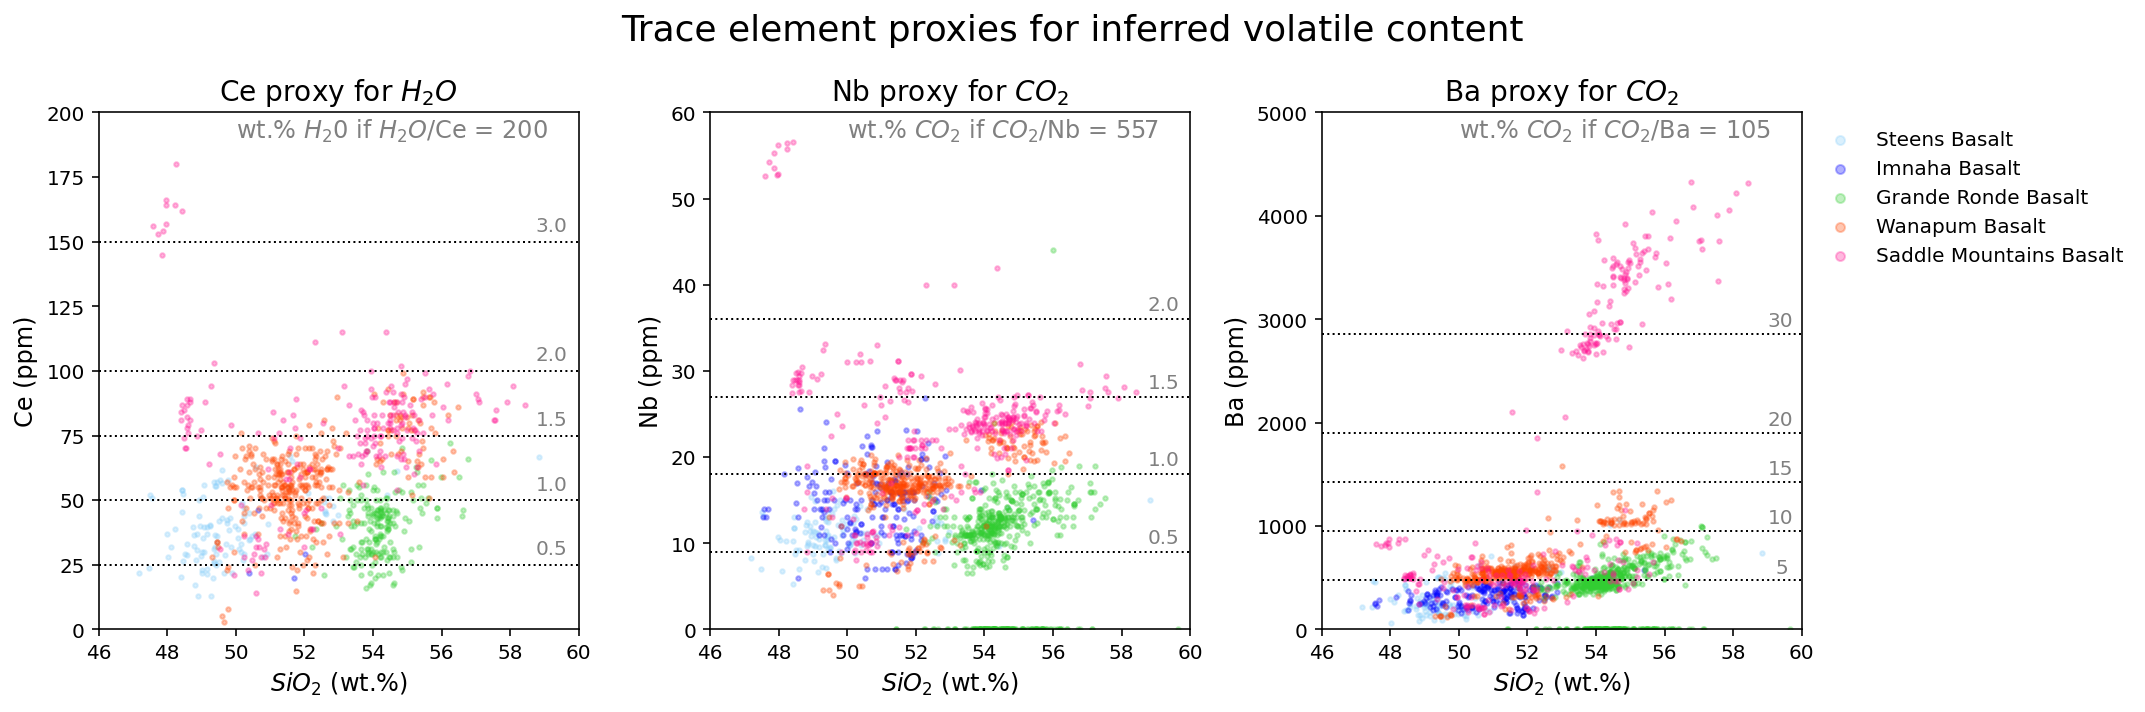

In [65]:
# Create a 3 column figure.
fig, ax= plt.subplots(ncols=3, figsize=(15,5), tight_layout = True)
fig.suptitle('Trace element proxies for inferred volatile content', fontsize=18)

# Plot whole rock data
gb_wholerock.get_group(' STEENS BASALT').plot.scatter(x='SIO2(WT%)NORM', y='CE(PPM)', c='lightskyblue', vmin=0, marker ='.', alpha=0.3, ax=ax[0])
gb_wholerock.get_group(' IMNAHA BASALT').plot.scatter(x='SIO2(WT%)NORM', y='CE(PPM)', c='blue', vmin=0, marker ='.', alpha=0.3, ax=ax[0])
gb_wholerock.get_group(' GRANDE RONDE BASALT').plot.scatter(x='SIO2(WT%)NORM', y='CE(PPM)', c='limegreen', vmin=0, marker ='.', alpha=0.3, ax=ax[0])
gb_wholerock.get_group(' WANAPUM BASALT').plot.scatter(x='SIO2(WT%)NORM', y='CE(PPM)', c='orangered', vmin=0, marker ='.', alpha=0.3, ax=ax[0])
gb_wholerock.get_group(' SADDLE MOUNTAINS BASALT').plot.scatter(x='SIO2(WT%)NORM', y='CE(PPM)', c='deeppink',vmin=0, marker ='.', alpha=0.3, ax=ax[0])

gb_wholerock.get_group(' STEENS BASALT').plot.scatter(x='SIO2(WT%)NORM', y='NB(PPM)', c='lightskyblue', vmin=0, marker ='.', alpha=0.3, ax=ax[1])
gb_wholerock.get_group(' IMNAHA BASALT').plot.scatter(x='SIO2(WT%)NORM', y='NB(PPM)', c='blue', vmin=0, marker ='.', alpha=0.3, ax=ax[1])
gb_wholerock.get_group(' GRANDE RONDE BASALT').plot.scatter(x='SIO2(WT%)NORM', y='NB(PPM)', c='limegreen', vmin=0, marker ='.', alpha=0.3, ax=ax[1])
gb_wholerock.get_group(' WANAPUM BASALT').plot.scatter(x='SIO2(WT%)NORM', y='NB(PPM)', c='orangered', vmin=0, marker ='.', alpha=0.3, ax=ax[1])
gb_wholerock.get_group(' SADDLE MOUNTAINS BASALT').plot.scatter(x='SIO2(WT%)NORM', y='NB(PPM)', c='deeppink',vmin=0, marker ='.', alpha=0.3, ax=ax[1])

gb_wholerock.get_group(' STEENS BASALT').plot.scatter(x='SIO2(WT%)NORM', y='BA(PPM)', c='lightskyblue', vmin=0, marker ='.', alpha=0.3, label = 'Steens Basalt', ax=ax[2])
gb_wholerock.get_group(' IMNAHA BASALT').plot.scatter(x='SIO2(WT%)NORM', y='BA(PPM)', c='blue', vmin=0, marker ='.', alpha=0.3,label = 'Imnaha Basalt', ax=ax[2])
gb_wholerock.get_group(' GRANDE RONDE BASALT').plot.scatter(x='SIO2(WT%)NORM', y='BA(PPM)', c='limegreen', vmin=0, marker ='.', alpha=0.3,label = 'Grande Ronde Basalt', ax=ax[2])
gb_wholerock.get_group(' WANAPUM BASALT').plot.scatter(x='SIO2(WT%)NORM', y='BA(PPM)', c='orangered', vmin=0, marker ='.', alpha=0.3, label = 'Wanapum Basalt', ax=ax[2])
gb_wholerock.get_group(' SADDLE MOUNTAINS BASALT').plot.scatter(x='SIO2(WT%)NORM', y='BA(PPM)', c='deeppink',vmin=0, marker ='.', alpha=0.3, label = 'Saddle Mountains Basalt', ax=ax[2])

# Add labels, legend, and set x- and y- axis extents.
ax[0].set_title('Ce proxy for $H_2O$', fontsize = 14)
ax[0].set_xlabel('$SiO_2$ (wt.%)', fontsize = 12)
ax[0].set_ylabel('Ce (ppm)', fontsize = 12)
ax[0].set_xlim(46,60)
ax[0].set_ylim(0,200)
ax[0].axhline(y=25, linestyle='dotted', color ='k', label='0.5')
ax[0].axhline(y=50, linestyle='dotted', color ='k', label='1.0')
ax[0].axhline(y=75, linestyle='dotted', color ='k', label='1.5')
ax[0].axhline(y=100, linestyle='dotted', color ='k', label='2.0')
ax[0].axhline(y=150, linestyle='dotted', color ='k', label='3.0')
ax[0].text(50, 190, r'wt.% $H_20$ if $H_2O$/Ce = 200', fontsize=12, color='gray')
ax[0].text(58.75, 29, r'0.5', fontsize=10, color='gray')
ax[0].text(58.75, 54, r'1.0', fontsize=10, color='gray')
ax[0].text(58.75, 79, r'1.5', fontsize=10, color='gray')
ax[0].text(58.75, 104, r'2.0', fontsize=10, color='gray')
ax[0].text(58.75, 154, r'3.0', fontsize=10, color='gray')

ax[1].set_title('Nb proxy for $CO_2$', fontsize = 14)
ax[1].set_xlabel('$SiO_2$ (wt.%)', fontsize = 12)
ax[1].set_ylabel('Nb (ppm)', fontsize = 12)
ax[1].set_xlim(46,60)
ax[1].set_ylim(0,60)
ax[1].axhline(y=9, linestyle='dotted', color ='k', label='0.5')
ax[1].axhline(y=18, linestyle='dotted', color ='k', label='1.0')
ax[1].axhline(y=27, linestyle='dotted', color ='k', label='1.5')
ax[1].axhline(y=36, linestyle='dotted', color ='k', label='2.0')
ax[1].text(50, 57, r'wt.% $CO_2$ if $CO_2$/Nb = 557', fontsize=12, color='gray')
ax[1].text(58.75, 10, r'0.5', fontsize=10, color='gray')
ax[1].text(58.75, 19, r'1.0', fontsize=10, color='gray')
ax[1].text(58.75, 28, r'1.5', fontsize=10, color='gray')
ax[1].text(58.75, 37, r'2.0', fontsize=10, color='gray')

ax[2].set_title('Ba proxy for $CO_2$', fontsize = 14)
ax[2].set_xlabel('$SiO_2$ (wt.%)', fontsize = 12)
ax[2].set_ylabel('Ba (ppm)', fontsize = 12)
ax[2].set_xlim(46,60)
ax[2].set_ylim(0,5000)
ax[2].axhline(y=476, linestyle='dotted', color ='k')
ax[2].axhline(y=952, linestyle='dotted', color ='k')
ax[2].axhline(y=1428, linestyle='dotted', color ='k')
ax[2].axhline(y=1904, linestyle='dotted', color ='k')
ax[2].axhline(y=2856, linestyle='dotted', color ='k')
ax[2].text(50, 4750, r'wt.% $CO_2$ if $CO_2$/Ba = 105', fontsize=12, color='gray')
ax[2].text(59.25, 548, r'5', fontsize=10, color='gray')
ax[2].text(59, 1024, r'10', fontsize=10, color='gray')
ax[2].text(59, 1498, r'15', fontsize=10, color='gray')
ax[2].text(59, 1976, r'20', fontsize=10, color='gray')
ax[2].text(59, 2928, r'30', fontsize=10, color='gray')
ax[2].legend(fontsize = 10, markerscale = 2)

plt.show();

<b>Figure 8:</b> Trace element proxies to estimate initial volatile contents of the CRBG magmas. Ce, Nb, and Ba vs. SiO2 to estimate H2O and CO2 concentrations, respectively. Plotted data is wholerock data. In each plot, dashed lines indicate predicted concentrations (wt.%) of specified volatiles, assuming mantle volatile/lithophile elemental ratios of 200 for H2O/Ce (Michael, 1995; Saal et al., 2002), 557 for CO2/Nb (Le Voyer et al., 2017), and 105 for CO2/Ba (Michael and Graham, 2015). 
<br/>
<br/>
<br/>

## References

GEOROC: Geochemistry of Rocks of the Oceans and Continents Database (http://georoc.mpch-mainz.gwdg.de/georoc/)
</br></br>Kasbohm, J. & Schoene, B. Rapid eruption of the Columbia River flood basalt and correlation with the mid-Miocene climate optimum. Science Advances. 4, 1–9 (2018)
</br></br>Le Voyer, M. et al. Heterogeneity in mantle carbon content from CO2-undersaturated basalts. Nature Communications. 8, 14062 (2017). 
</br></br>Michael, P. Regionally distinctive sources of depleted MORB: Evidence from trace elements and H2O. Earth and Planetary Science Letters. 131, 301–320 (1995)
</br></br>Michael, P. J. & Graham, D. W. Lithos The behavior and concentration of CO 2 in the suboceanic mantle : Inferences from undegassed ocean ridge and ocean island basalts. LITHOS 236–237, 338–351 (2015)
</br></br>Saal et al., (2002)
</br></br>Williams et al. pyrolite: Python for geochemistry. Journal of Open Source Software, 5(50), 2314, doi: 10.21105/joss.02314 (2020)
